In [1]:
!pip install numpy scipy matplotlib neuron --quiet

In [2]:
import numpy as np
import pylab as plt
plt.ion()

In [3]:
!nrnivmodl > null.out

/home/tnieus/mne-python/1.1.0_0/envs/neuron/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


# Model setting

In [4]:
from neuron import h
soma = h.Section(name='soma')

soma.L = 10
soma.diam = 10
soma.insert('sodium')
soma.insert('potassium')
soma.insert('leak')

soma

In [5]:
print(soma.gnabar_sodium)
print(soma.gkbar_potassium)

0.12
0.036


In [10]:
tstop = 1000
onset = 200
dur = tstop - 2 * onset

## Define inputs

In [15]:
# step current
iclamp = h.IClamp(soma(0.5))
iclamp.delay = onset
iclamp.dur = dur
iclamp.amp = 0.02 # (nA)

# record voltage and time
v = h.Vector().record(soma(0.5)._ref_v)             # Membrane potential vector
t = h.Vector().record(h._ref_t)                     # Time stamp vector

In [ ]:
# record spike time stamps
record = {}        
nc_spike = h.NetCon(soma(0.5)._ref_v, None, -20, 0, 1, sec=soma)

record['spk'] = h.Vector()
nc_spike.record(record['spk'])


# Run simulation

In [16]:
h.load_file('stdrun.hoc')
h.finitialize(-65)
h.tstop = tstop
h.run()

0.0

Text(0, 0.5, 'v (mV)')

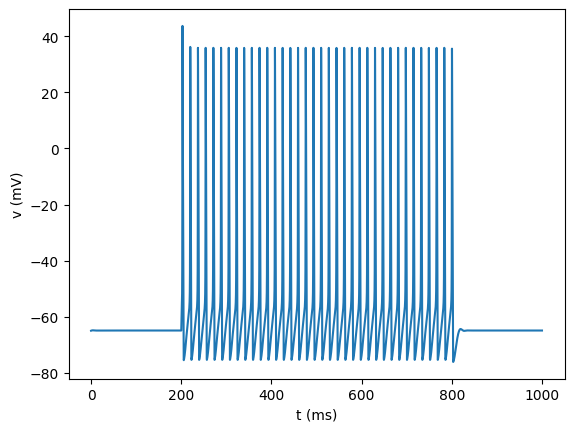

In [17]:
v_arr = np.array(v)
t_arr = np.array(t)

plt.figure()
plt.plot(t_arr, v_arr)
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
